# Critical Value Calculator

Input significance level and other parameters for the appropriate critical value and a rejection region plot. 

### Does the sign matter for a critical value? 
Yes, but sometimes we ignore it. It's common to say that 1.96 is the critical value for a two-sided $z$-test with $\alpha = .05$. In that case, it is implied by two-sidedness that the rejection region covers values above 1.96 and below -1.96. Below, the signs are made explicit so the critical value denotes the rejection region boundary.

Dropdown(description='Kind', index=1, options=('t', 'z'), value='z')

Dropdown(description='Alternative', options=('Two-sided', '>', '<'), value='Two-sided')

IntText(value=10, description='Deg Freedom')

Button(description='Get critical value', style=ButtonStyle())

Output()

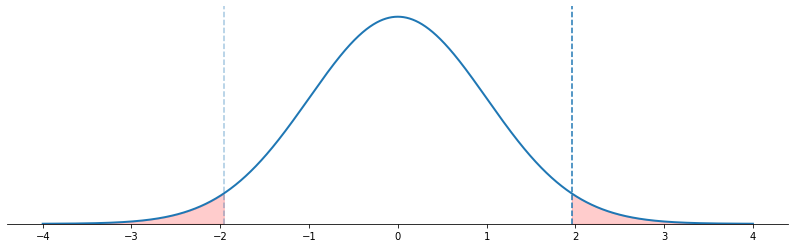

In [1]:
#@title Input
import ipywidgets as widgets
from IPython.display import display, HTML
from IPython.display import Markdown as md
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

alternative = widgets.Dropdown(description = 'Alternative',
                               options = ['Two-sided', '>', '<'])

significance_level = widgets.FloatText(description = 'Significance Level',
                              value=0.05,
                              min=0,
                              max=1,
                              step=0.01,
                              disabled=False,
                              style = dict(description_width='initial'))

confidence_level = widgets.FloatText(description = 'Confidence Level',
                              value=0,
                              disabled=False,
                              style = dict(description_width='initial'))

stat_type = widgets.Dropdown(description = 'Kind',
                             value = 'z',
                             options = ['t', 'z'])

confidence_input = widgets.HBox([significance_level]) #, confidence_level])

degrees_of_freedom = widgets.IntText(description = 'Deg Freedom',
                                     value = 10,)

calc_button = widgets.Button(description = 'Get critical value')
calc_output = widgets.Output()
plot_output = widgets.Output()

def get_critical_value():
  alpha = significance_level.value
  global result
  if stat_type.value == 'z':

    if alternative.value == 'Two-sided':
      result = stats.norm.ppf(1 - alpha/2)
    elif alternative.value == '>':
      result = stats.norm.ppf(1 - alpha)
    else:
      result = - stats.norm.ppf(1 - alpha)
  
  else:

    dof = degrees_of_freedom.value
    if alternative.value == 'Two-sided':
      result = stats.t.ppf(q = 1-alpha/2, df = dof)
    elif alternative.value == '>':
      result = stats.t.ppf(q = 1 - alpha, df = dof)
    else:
      result = - stats.t.ppf(q = 1 - alpha, df = dof)


  # show user the result
  calc_output.clear_output()
  with calc_output:
    s = "<tt>the critical value is **{:+,.2f}**.</tt>".format(result)
    if alternative.value == 'Two-sided':
      s = "<tt>the critical value is **+/-{:,.2f}**.</tt>".format(result)
    confidence_str = "<tt>For a confidence level of **{:.1f}%**, </tt>".format(100*(1-alpha))
    display(md(confidence_str + s))

  # make plot

  xmax = np.max([np.abs(result)*1.1, 4])

  x = np.linspace(-xmax, xmax, 100_000)
  
  if stat_type.value == 'z':
    y = stats.norm.pdf(x)
  else:
    y = stats.t.pdf(x = x, df = dof)

  #plot_output.clear_output()
  with plot_output:

    fig, ax = plt.subplots(figsize = (14,4))
    ax.plot(x,y, lw = 2)

    # add critical value
    ax.axvline(result, linestyle = 'dashed')

    # shade rejection region
    if alternative.value == 'Two-sided':
      ax.axvline(-result, linestyle = 'dashed', alpha = 0.4)

      right_x = x[x > np.abs(result)]
      right_y = y[-len(right_x):]
      ax.fill_between(right_x, right_y, alpha = .2, color = 'red')
      
      left_x = x[x < -np.abs(result)]
      left_y = y[:len(left_x)]
      ax.fill_between(left_x, left_y, alpha = .2, color = 'red')
    
    elif alternative.value == '>':
      right_x = x[x > result]
      right_y = y[-len(right_x):]
      ax.fill_between(right_x, right_y, alpha = .2, color = 'red')

    else:
      left_x = x[x < result]
      left_y = y[:len(left_x)]
      ax.fill_between(left_x, left_y, alpha = .2, color = 'red')
    

    # clean plot
    for s in 'left', 'right', 'top':
      ax.spines[s].set_visible(False)
    ax.yaxis.set_ticks([])
    ylim = ax.get_ylim()
    ax.set_ylim(0, ylim[1])


display(stat_type)
display(alternative)
display(confidence_input)
display(degrees_of_freedom)
display(calc_button)
display(calc_output)
calc_button.on_click(lambda x: get_critical_value())
